In [1]:
from games.tic_tac_toe import TicTacToe
from networks.tic_tac_toe_net import create_network

from lib.model import Model

import numpy as np
np.random.seed(42)

import platform
if platform.system() == "Darwin":
    %config InlineBackend.figure_format="retina"  # For high DPI display

In [2]:
game = TicTacToe()
model = Model(create_network(game.shape, game.nb_actions), summary=True)
model.load("networks/trained/network_tic_tac_toe.h5")

2022-01-17 01:41:50.687234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 01:41:50.733271: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 01:41:50.733475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-17 01:41:50.734074: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "TicTacToe_network"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 3, 1)]    0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 3, 3, 512)    1024        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 3, 3, 512)   2048        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 3, 3, 512)    0           ['batch_normaliza

In [3]:
state = game.get_init_state()
model.predict(game.get_canonical_form(state))

2022-01-17 01:41:56.442054: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8301


(array([0.09746712, 0.03648195, 0.06522924, 0.03343812, 0.09733564,
        0.04212959, 0.30695373, 0.03567138, 0.28529325], dtype=float32),
 0.42932516)

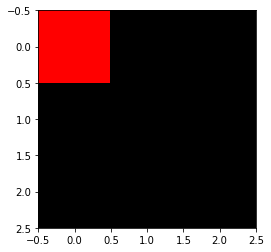

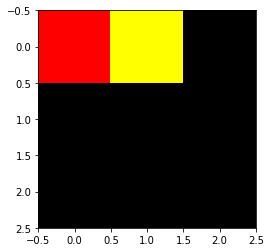

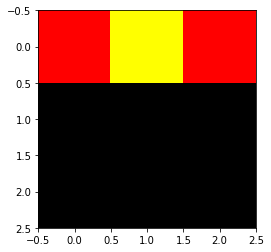

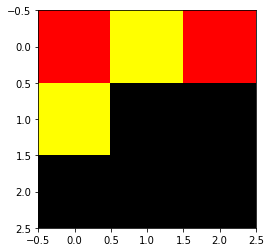

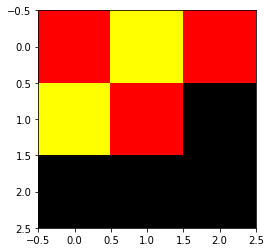

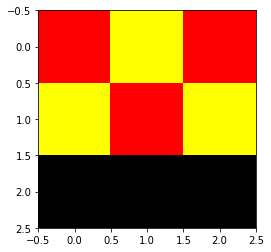

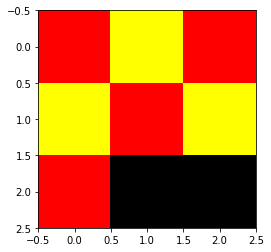

In [4]:
state = game.get_init_state()
game.play_vs_bot(model, Model(create_network(game.shape, game.nb_actions)), state, 1)

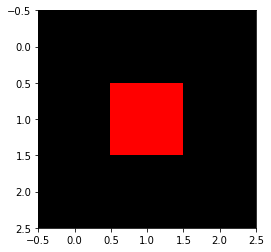

Model prediction: (array([0.09746712, 0.03648195, 0.06522924, 0.03343812, 0.09733564,
       0.04212959, 0.30695373, 0.03567138, 0.28529325], dtype=float32), 0.42932516)
Root value: 0.6416785097122193


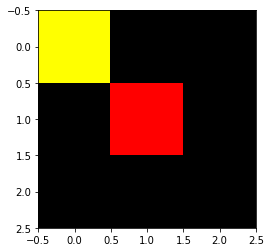

Model prediction: (array([0.10550153, 0.05432313, 0.08169798, 0.09780149, 0.00168575,
       0.06285174, 0.42350578, 0.0766276 , 0.09600496], dtype=float32), -0.7809235)


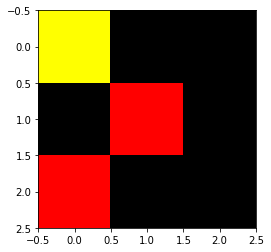

Model prediction: (array([0.00888401, 0.08073928, 0.05354221, 0.12783633, 0.00130278,
       0.02337034, 0.40807268, 0.14136508, 0.15488729], dtype=float32), 0.8080299)
Root value: 0.8244491004943848


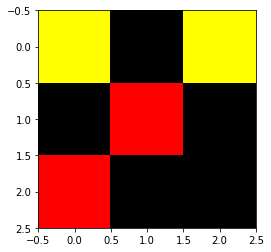

Model prediction: (array([0.00396932, 0.02885823, 0.27866447, 0.29139292, 0.00289863,
       0.06706573, 0.00113539, 0.14377214, 0.18224315], dtype=float32), -0.92223984)


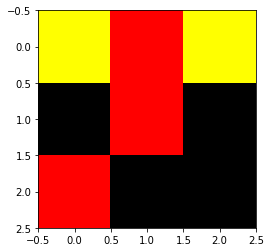

Model prediction: (array([4.1496931e-04, 1.3279123e-04, 3.2023708e-03, 2.5529251e-02,
       2.2151205e-04, 4.8494265e-05, 6.8678120e-05, 4.4525512e-02,
       9.2585641e-01], dtype=float32), 0.9956373)
Root value: 0.8655309844017028


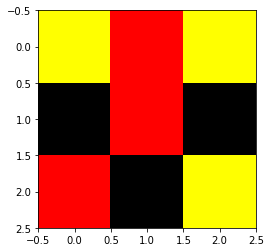

Model prediction: (array([3.3084775e-04, 3.0104169e-10, 8.2308115e-06, 5.2107424e-01,
       6.3276769e-07, 4.6962318e-01, 1.9007233e-05, 7.0225941e-03,
       1.9212625e-03], dtype=float32), -0.9875376)


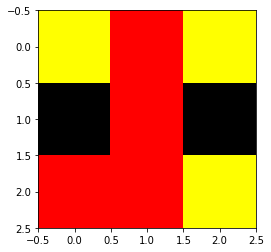

Model prediction: (array([4.1301817e-05, 2.9484826e-01, 5.2696814e-05, 5.9943485e-01,
       9.2636253e-04, 1.3608986e-02, 7.2559844e-05, 9.0573296e-02,
       4.4165802e-04], dtype=float32), 0.98864156)
Root value: 0.8797980630397797


In [7]:
state = game.get_init_state()
#state = game.get_new_state(state, 4)
#state = game.get_new_state(state, 3)
game.play_vs(model, state, 50)